In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
%matplotlib inline

## Plots describing different file formats used

In [2]:
df = pd.read_csv("FAIRly_Depositing_Segmentations.csv")
df.head()

,PublicationTitle,DatabaseIDs,PublicationDate,PublicationDOI,StudyType,SegmentationUse,SourceData,TrainingData,LabelData,Code,Modality,FileFormatsSource,FileFormatsTraining,FileFormatsLabel,DataOrigin,SegmentationType,SegmentationMethod,BiologicalScale,Notes
0,A novel framework for segmentation of secretor...,NaN,2014,10.1016/j.media.2013.12.008,Software,Proof-of-concept,No,NaN,No,No,TEM,NaN,NaN,NaN,this study,Semantic,Automated,Subcellular,NaN
1,Cryo-FIB-SEM serial milling and block face ima...,NaN,2016,10.1016/j.jsb.2016.09.016,Method,Qualitative visualisation,No,NaN,No,No,Cryo-FIB-SEM,NaN,NaN,NaN,this study,Semantic,Automated,Subcellular,NaN
2,Convolutional neural networks for automated an...,"EMD-8594, EMD-8589, EMD-8590, EMD-8591, EMD-85...",2017,10.1038/nmeth.4405,Software,STA,No,NaN,EMDB,Github,Cryo-ET,NaN,NaN,map,"this study, public data",Instance,Automated,Subcellular,Code integrated into existing software EMAN2
3,Extracellular space preservation aids the conn...,NaN,2015,10.7554/eLife.08206,Method,Proof-of-concept,Dryad,No,No,No,SBF SEM,zipped,NaN,NaN,this study,Instance,Automated,Tissue (connectomics),NaN
4,Domain adaptation for microscopy imaging,NaN,2015,10.1109/TMI.2014.2376872,Software,Proof-of-concept,Some (DIADEM),Some (DIADEM),No,Institutional - working,3D EM,tiff,swc,NaN,this study,Semantic,Automated,Subcellular,Need to find code from reference to another pa...


In [ ]:
# Boilerplate

def count_each_category(df_series, lookup_dict):
    """Counts records within a specific category defined by lookup dict
    e.g., if we want to count all records with public challenges as the data source,
    then lookup_dict should list all the data sources which count as public challenges.

    Args:
        df_series (pd.Series): records to look through, e.g., df[TrainingData]
        lookup_dict (_type_): _description_

    Returns:
        _type_: _description_
    """
    category_counts = {}
    for category in set(lookup_dict.values()):
        category_counts[category] = 0
    for i in df_series:
        if pd.isna(i):
            pass
        else:
            for value, category in lookup_dict.items():
                if value.lower() in i.lower():
                    category_counts[category] += 1
    return category_counts

def subplot_bar(data, ax, colour):
    sns.barplot(data=data, x="Percentage", y="FileFormat", hue="FileFormat", ax=ax, palette=colour, legend=False)
    labels = []
    for i in range(len(data)):
        if data.iloc[i].Count > 0:
            labels.append(f"{data.iloc[i].Percentage:.1f}%, {data.iloc[i].Count:.0f}")
        else:
            labels.append("")
    for i, label in enumerate(labels):
        ax.text(2, i, label)

def plot_fileformats(fileformats_df, title=None):

    sns.set_style("whitegrid")
    fig, axs = plt.subplots(4, 3, sharex=True, figsize=(8,11), height_ratios=[4,3,4,2], subplot_kw={"xticklabels": ""})

    colours = ["light:green_r", "light:steelblue", "light:orchid", "light:orange_r"]
    for i, datatype in enumerate(["SourceData", "TrainingData", "LabelData"]):
        for category in fileformats_df.FileFormatCategory:
            data = fileformats_df[(fileformats_df.DataType == datatype) & (fileformats_df.FileFormatCategory == category)]
            subplot_bar(data, axs[category, i], colours[category])

    titles = ["Chunked\n", "General", "Open-source Microscopy-specific", "Other"]
    datatypes = ["Source Data", "Training Data", "Label Data"]

    for i in range(4):
        for j in range(3):
            axs[i,j].set_xlabel("")
            axs[i,j].set_ylabel("")
            if j > 0:
                axs[i,j].set_yticklabels("")
                axs[i,j].set_title("")
                axs[0,j].set_title(datatypes[j])
            axs[i,0].set_title(titles[i], position=(-1.3,0), ha="left", fontweight="bold", fontsize="x-large")

    plt.subplots_adjust(
        top=0.931,
        bottom=0.015,
        left=0.302,
        right=0.981,
        hspace=0.186,
        wspace=0.085
    )
    fig.text(0.35,0.94,"Source Data", fontsize="large")
    sns.set_style("whitegrid")

    plt.savefig(f"./figs/{title}_fileformats.svg", transparent=True, dpi=200)

In [4]:
# Categories of file formats

fileformats_lookup = {
    "tiff": "tiff",
    "zipped": "zipped",
    "map": "map",
    "Any - accessed with API": "API",
    "mrc": "mrc",
    "dm4": "proprietary",
    "png": "png",
    "raw": "raw",
    "nii": "other",
    "n5": "n5",
    "hdf5": "hdf5",
    "zarr": "zarr",
    "dv": "other",
    "mat": "proprietary",
    "Unclear": "other",
    "various": "other",
    "swc": "other",
    "dat": "other",
    "xml": "other",
    "nrrd": "other",
    "npz": "other",
    "mod": "other",
    "obj": "other",
    "blender": "other",
    "am": "proprietary",
    "nmx": "other",
    "h5": "hdf5",
    "stl": "other",
    "rar": "zipped",
}


In [5]:
# Sort file formats into categories and count

fileformats_df = pd.DataFrame.from_dict({
    "SourceData": count_each_category(df.FileFormatsSource, fileformats_lookup),
    "TrainingData": count_each_category(df.FileFormatsTraining, fileformats_lookup),
    "LabelData": count_each_category(df.FileFormatsLabel, fileformats_lookup)
})

fileformats_df["FileFormat"] = fileformats_df.index

fileformats_df = fileformats_df.melt(
    id_vars="FileFormat",
    value_vars=["SourceData", "TrainingData", "LabelData"],
    var_name="DataType",
    value_name="Count"
)

fileformats_df.head()

,FileFormat,DataType,Count
0,proprietary,SourceData,5
1,hdf5,SourceData,2
2,API,SourceData,12
3,tiff,SourceData,30
4,mrc,SourceData,10


In [6]:
# Add percentages

# datatype_total_counts = number of non N/A publications for each data type
# need to count separately as deposition_category_counts_df has duplicates for where data is sourced from multiple locations
datatype_total_counts = {
    "SourceData": df.FileFormatsSource.count().sum(),
    "TrainingData": df.FileFormatsTraining.count().sum(),
    "LabelData": df.FileFormatsLabel.count().sum()
}
pct = []
for i in range(len(fileformats_df)):
    pct.append(100 * fileformats_df.iloc[i].Count / datatype_total_counts[fileformats_df.iloc[i].DataType])

fileformats_df["Percentage"] = pct
fileformats_df.head()

,FileFormat,DataType,Count,Percentage
0,proprietary,SourceData,5,5.319149
1,hdf5,SourceData,2,2.127660
2,API,SourceData,12,12.765957
3,tiff,SourceData,30,31.914894
4,mrc,SourceData,10,10.638298


In [7]:
# Categorise according to the following categories of deposition locations:
# 0 - chunked
# 1 - general
# 2 - microscopy-specific
# 3 - other

fileformat_category = []
for i in range(len(fileformats_df)):
    if fileformats_df.iloc[i].FileFormat in ["API", "hdf5", "n5", "zarr"]:
        fileformat_category.append(0)  # chunked
    elif fileformats_df.iloc[i].FileFormat in ["tiff", "png", "zipped",]:
        fileformat_category.append(1)  # general
    elif fileformats_df.iloc[i].FileFormat in ["raw", "map", "mrc", "nii"]:
        fileformat_category.append(2)  # microscopy-specific
    else:
        fileformat_category.append(3)  # other

fileformats_df["FileFormatCategory"] = fileformat_category
fileformats_df.head()

,FileFormat,DataType,Count,Percentage,FileFormatCategory
0,proprietary,SourceData,5,5.319149,3
1,hdf5,SourceData,2,2.127660,0
2,API,SourceData,12,12.765957,0
3,tiff,SourceData,30,31.914894,1
4,mrc,SourceData,10,10.638298,2


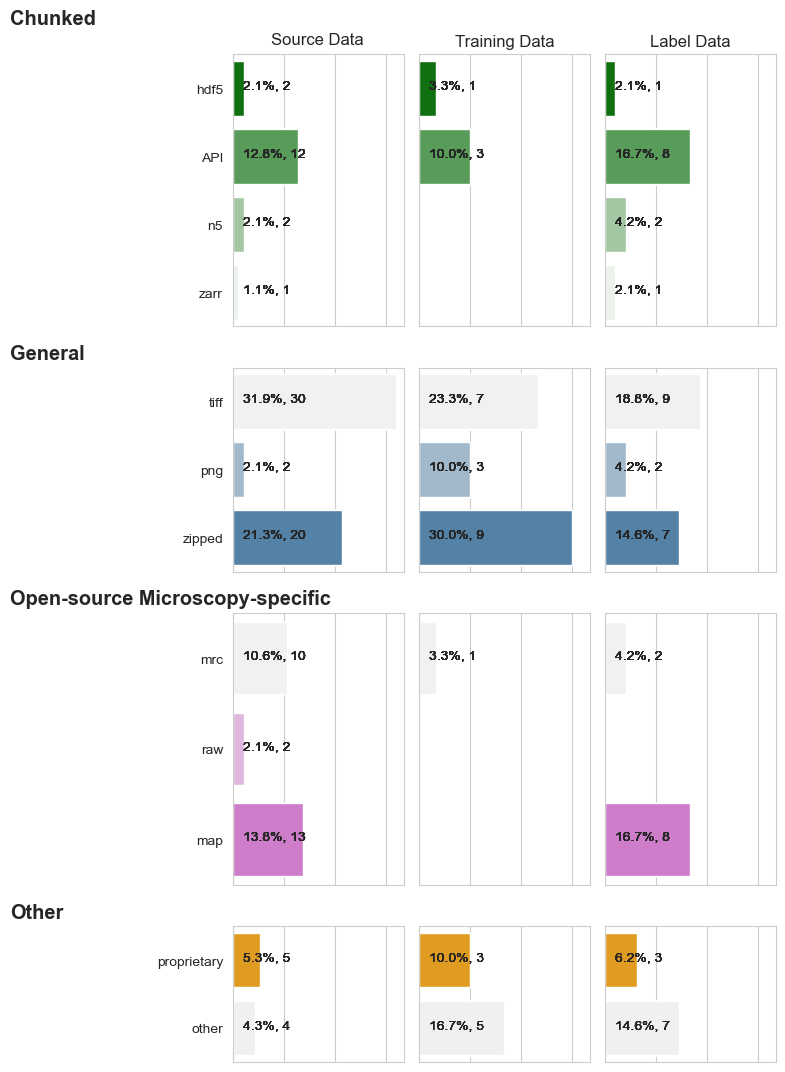

In [8]:
# Plot for all data

plot_fileformats(fileformats_df, "all")